In [1]:
from bayes_opt import BayesianOptimization
import numpy as np
from sklearn.gaussian_process.kernels import Matern

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# plt.style.use(['dark_background'])

In [2]:
def xi_scheduler(iteration, max_iterations):
    return 0.001 + 0.19 * np.exp(-2 * float(iteration) / float(max_iterations))

In [3]:
def posterior(bo, x):
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((min(x), max(x)))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((min(x), max(x)))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

In [4]:
def target(x):
    return x * np.exp(-10000 * (x - 0.5)**2) - 5 + 0.1 * x + 0.01 * np.random.rand()

In [5]:
x = np.linspace(0.2, 0.7, 100).reshape(-1, 1)

In [6]:
gp_params = {'kernel': 1.0 * Matern(length_scale = 0.01, length_scale_bounds = (1e-5, 1e5), nu = 1.5),
             'alpha':1e-4}

In [7]:
bo = BayesianOptimization(target, {'x': (0.2, 0.7)})

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   -4.93616 |    0.5805 | 
    2 | 00m00s |   -4.47929 |    0.4973 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


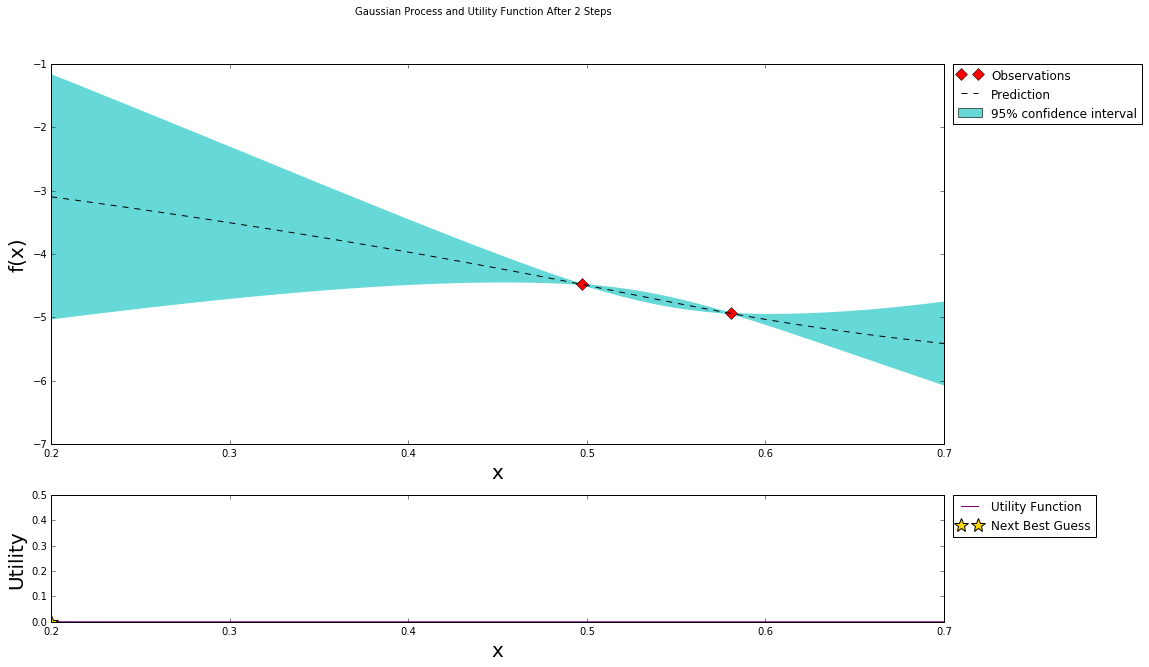

In [8]:
bo.maximize(init_points=2, n_iter=0, acq='poi', kappa=5, xi = xi_scheduler(0.0, 50), **gp_params)
plot_gp(bo, x)

using xi = 0.191
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    3 | 00m03s |   -4.95759 |    0.3388 | 
using xi = 0.178746327156
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    4 | 00m02s |   -4.97855 |    0.2000 | 
using xi = 0.167282930618
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    5 | 00m02s |   -4.94538 |    0.4499 | 
using xi = 0.156558843085
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    6 | 00m02s |   -4.92246 |    0.7000 | 
using xi = 0.146526384289
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
    7 | 00m03s |   -4.93401 |    0.5218 | 
using xi = 0.137140949009
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x

/cvmfs/cms.cern.ch/slc6_amd64_gcc630/external/py2-pippkgs_depscipy/3.0-fmblme3/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  8.09902735e-06,  -2.16636881e-05]), 'nit': 9, 'funcalls': 65}
  " state: %s" % convergence_dict)


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   23 | 00m02s |   -4.92571 |    0.6558 | 
using xi = 0.0478534231489
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   24 | 00m02s |   -4.96543 |    0.2902 | 
using xi = 0.0448317046284
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   25 | 00m02s |   -4.96576 |    0.3232 | 
using xi = 0.0420048658458
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   26 | 00m02s |   -4.92459 |    0.6869 | 
using xi = 0.039360338419
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   27 | 00m02s |   -4.44141 |    0.5001 | 
using xi = 0.0368863645391
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   28 | 0

/cvmfs/cms.cern.ch/slc6_amd64_gcc630/external/py2-pippkgs_depscipy/3.0-fmblme3/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.34078000e-05,  -4.11269514e-05]), 'nit': 10, 'funcalls': 66}
  " state: %s" % convergence_dict)


using xi = 0.0303812702644
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   31 | 00m02s |   -4.44708 |    0.5008 | 
using xi = 0.0284863835614
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 
   32 | 00m03s |   -4.45867 |    0.4987 | 


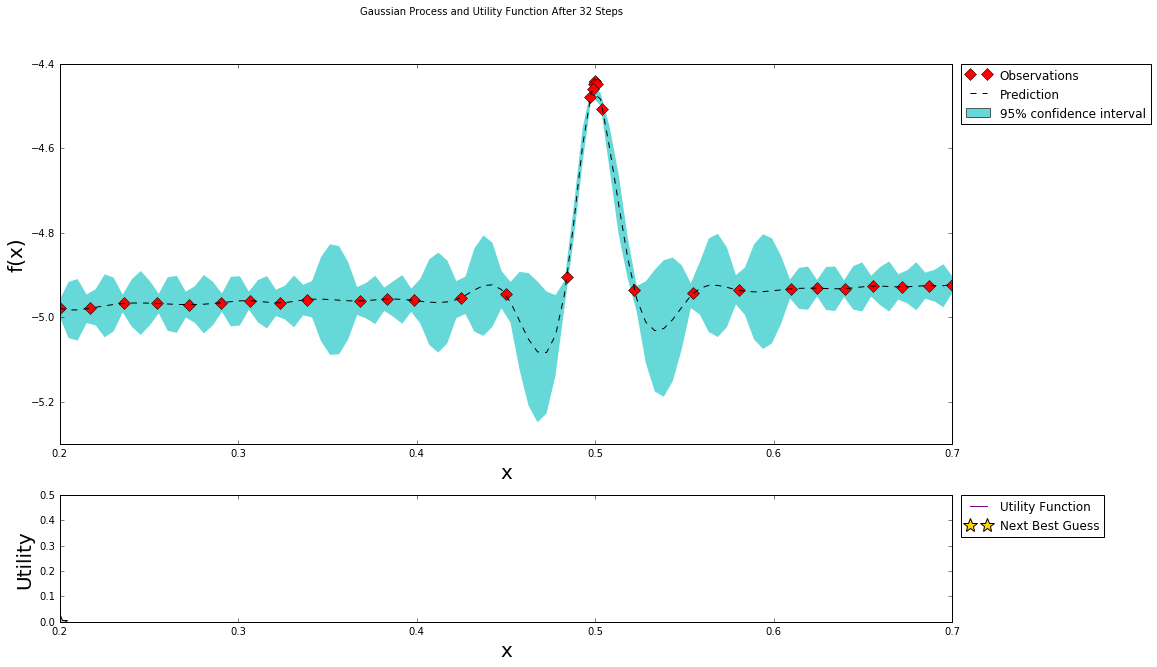

In [9]:
for it in range(30):
    xi = xi_scheduler(it, 30)
    print "using xi = " + str(xi)
    bo.maximize(init_points=0, n_iter=1, acq='poi', kappa=5, xi = xi, **gp_params)
plot_gp(bo, x)

In [290]:
bo.res['max']

{'max_params': {'x': 0.49909125305405261, 'y': 0.50324720833222436},
 'max_val': -4.4063175200736788}

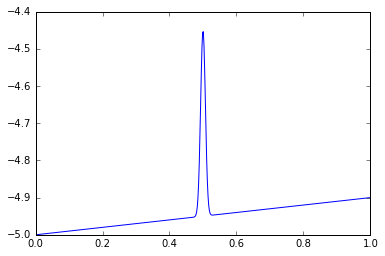

In [216]:
plt.plot(x,y)

In [22]:
xi_scheduler(6, 30)

0.071765061564378424